In [16]:
! pip install keras

## 자연어처리(Natural Language Processing-NLP)

### 1. 텍스트의 토큰화
단어/문장(string)을 컴퓨터가 이해할 수 있는 숫자(vector)로 변환
- BOW(Bag of Words)
- TF-IDF
- Word Embedding

In [1]:
import pandas as pd

# Corpus
sentences = ['I love my dog.',
             'I love my cat.',
             'I love my dog and love my cat',
             'Do you think my dog is amazing?']

## 1-1. Bag of Word (BOW)
- 모든 문장을 토큰화 하고 각 문장에 토큰이 몇번 등장하는지 count
- 각 token을 feature화 => Text Vectorization
**BOW(Bags of Words)의 문제점**
1. 단어들 간의 순서를 유지할 수 없음 -> n-grams 기법으로 일부 해결
    - 문제점 : feature 갯수가 기하급수적으로 증가할 수 있음
2. Counter가 normalize 되어있지 않음 -> TF-IDF로 해결
3. 단순히 단어가 나타나는 횟수만 count

- CountVectorizer
    - min_df : vocabulary 에 포함할 최소 발생 빈도
    - ngram_range : (1, 1) - unigram only, (1, 2) - unigram + bigram
    - max_features : top max_features 만으로 vocabulary 구성
    - token_pattern = (?u)\\b\\w\\w+\\b : unocode 영수자 2 글자 이상만 포함

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer

CountVectorizer()

## Text vs token Matrix 생성

In [4]:
features = count_vectorizer.fit_transform(sentences)
features

<4x10 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [5]:
print(f"document 수: {features.shape[0]}")
print(f"단어수: {features.shape[1]-1}")

document 수: 4
단어수: 9


In [7]:
vectorized_sentences = features.toarray()
vectorized_sentences

array([[0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 1, 0, 1, 0, 2, 2, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]], dtype=int64)

## features의 단어 list

In [8]:
feature_names = count_vectorizer.get_feature_names_out()
feature_names

array(['amazing', 'and', 'cat', 'do', 'dog', 'is', 'love', 'my', 'think',
       'you'], dtype=object)

In [9]:
df = pd.DataFrame(vectorized_sentences,columns=feature_names)
df.index.name = 'sentence'
df

,amazing,and,cat,do,dog,is,love,my,think,you
sentence,,,,,,,,,,
0,0,0,0,0,1,0,1,1,0,0
1,0,0,1,0,0,0,1,1,0,0
2,0,1,1,0,1,0,2,2,0,0
3,1,0,0,1,1,1,0,1,1,1


## 1-2. TF-IDF
- TF-IDF(Term Frequency - Inverse Document Frequency)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer

TfidfVectorizer()

In [11]:
tfidf_sentences = tfidf_vectorizer.fit_transform(sentences)
tfidf_sentences

<4x10 sparse matrix of type '<class 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>

##  Text vs TF-IDF Matrix 생성

In [12]:
tfidf_vect_sentences = tfidf_sentences.toarray()
tfidf_vect_sentences

array([[0.        , 0.        , 0.        , 0.        , 0.61217198,
        0.        , 0.61217198, 0.5004907 , 0.        , 0.        ],
       [0.        , 0.        , 0.69113141, 0.        , 0.        ,
        0.        , 0.55953044, 0.4574528 , 0.        , 0.        ],
       [0.        , 0.45893203, 0.36182728, 0.        , 0.29293037,
        0.        , 0.58586074, 0.47897954, 0.        , 0.        ],
       [0.41960069, 0.        , 0.        , 0.41960069, 0.26782569,
        0.41960069, 0.        , 0.21896505, 0.41960069, 0.41960069]])

In [13]:
tfidf_feature_names = count_vectorizer.get_feature_names_out()
tfidf_feature_names

array(['amazing', 'and', 'cat', 'do', 'dog', 'is', 'love', 'my', 'think',
       'you'], dtype=object)

In [14]:
df = pd.DataFrame(tfidf_vect_sentences,columns = tfidf_feature_names)
df

,amazing,and,cat,do,dog,is,love,my,think,you
0,0.000000,0.000000,0.000000,0.000000,0.612172,0.000000,0.612172,0.500491,0.000000,0.000000
1,0.000000,0.000000,0.691131,0.000000,0.000000,0.000000,0.559530,0.457453,0.000000,0.000000
2,0.000000,0.458932,0.361827,0.000000,0.292930,0.000000,0.585861,0.478980,0.000000,0.000000
3,0.419601,0.000000,0.000000,0.419601,0.267826,0.419601,0.000000,0.218965,0.419601,0.419601


### One-hot-encoding
- 단어를 단순히 index 번호에 따라 one-hot-encoding으로 vectorize
    -> 단어간의 유사성을 파악 못함
- 해결책 : **Word Embedding**
    - 단어/문장 간 관련도 계산
    - 의미적/문법적 정보 함축
    - 전이 학습 가능

## 1-3. Word Embedding
- 숫자화된 단어의 나열로부터 sentiment 추출
- 연관성 있는 단어들을 군집화하여 multi-dimension 공간에 vector로 표시
    - 단어나 문장을 vector space로 끼워 넣음(embedding)
- 예를 들어, 호감(positive), 비호감(negative) 두 가지 label에 따라 관련 단어들을 두 개의 category로 군집화


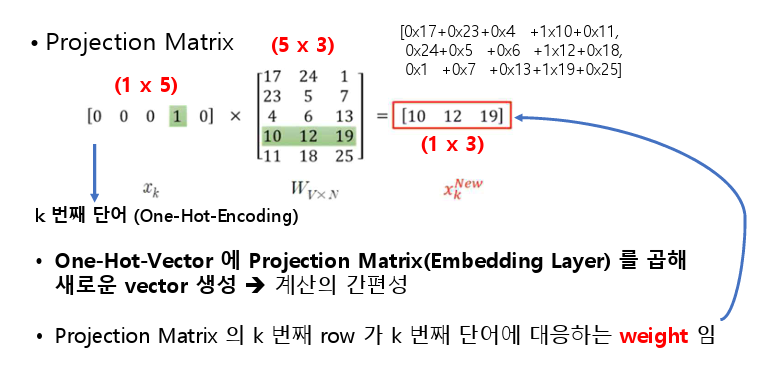

## 1-4. Word2Vec
- One-Hidden Layer의 shallow network - 최초의 neural embedding model
- 매우 큰 corpus에서 자동학습(비지도 학습)
- 중심단어로 주변 단어를(skip-gram), 주변 단어로 중심 단어(CBOW) 예측하는 과정에서 단어를 벡터로 임베딩하는 2 가지 방법
- 임베딩 된 단어의 내적(inner product)이 코사인 유사도가 되도록 함
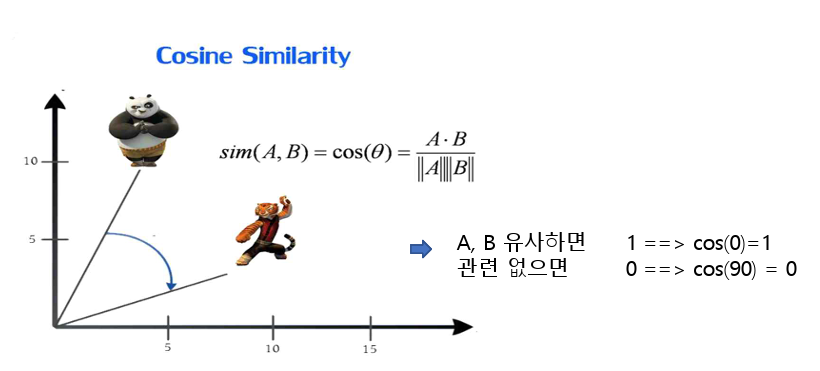
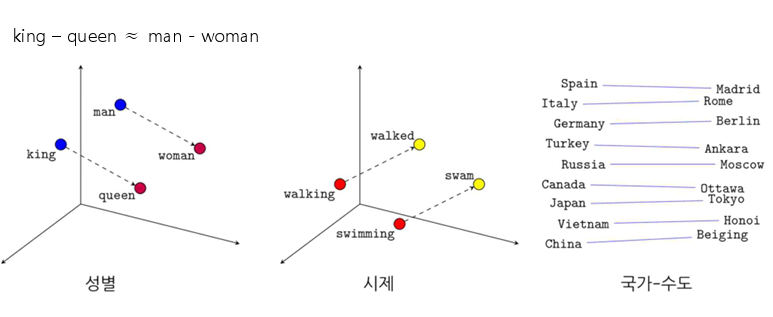

## Word2vec 작성
- skipgram,window size2의 simplified word2vec model 작성

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import re

## Toy 말뭉치

In [19]:
corpus = ['king is a very strong man', 
          'queen is a wise and pretty woman', 
          'boy is a young man',
          'girl is a young and pretty woman',
          'prince is young and will be a strong and wise king',
          'princess is a young woman and will be a pretty and wise queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be a king',
          'princess is a girl will be a queen']

# corpus = ['왕은 매우 강한 남자이다', 
#           '여왕은 현명한 예쁜 여자이다', 
#           '소년은 젊은 남자이다',
#           '소녀는 젊은 예쁜 여자이다',
#           '왕자는 젊고 현명한 왕이 될 것이다',
#           '공주는 젊고 예쁜 현명한 여왕이 될 것이다',
#           '남자는 강하다', 
#           '여자는 예쁘다',
#           '왕자는 왕이 될 소년이다',
#           '공주는 왕비가 될 소녀이다']

In [20]:
cleaned_corpus = []
for text in corpus:
    print(text)
    text = re.sub(r'[^a-zA-Z]', '', text)  #영문
    #text = re.sub(r'[^a가-힣]', '', text)  #한글
    cleaned_corpus.append(text.lower())

king is a very strong man
queen is a wise and pretty woman
boy is a young man
girl is a young and pretty woman
prince is young and will be a strong and wise king
princess is a young woman and will be a pretty and wise queen
man is strong
woman is pretty
prince is a boy will be a king
princess is a girl will be a queen


## stopword 제거

In [21]:
stop_words = ['is', 'a' ,'will', 'be', 'and']
#stop_words = ['은', '가', '이다', '는', '이', '될']

results = []
    
for text in corpus:
    tmp = []
    #for word in okt.morphs(text):  
    for word in text.split():
        if word not in stop_words:
            tmp.append(word)
    results.append(' '.join(tmp))

In [22]:
cleaned_corpus = results
cleaned_corpus

['king very strong man',
 'queen wise pretty woman',
 'boy young man',
 'girl young pretty woman',
 'prince young strong wise king',
 'princess young woman pretty wise queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

## vocaburary 모음 작성

In [23]:
words = []

for sentence in corpus:
    for word in sentence.split(' '):
        words.append(word)

words = list(set(words))
words

['man',
 'pretty',
 'young',
 'will',
 'is',
 'and',
 'queen',
 'a',
 'be',
 'woman',
 'prince',
 'princess',
 'girl',
 'strong',
 'very',
 'king',
 'wise',
 'boy']

## word-to-index, index-to-word 작성
- word를 index로 변환
- sentence를 word index로 변환
- window size에 따라 train data 생성

In [24]:
word2index = dict((w, i) for i, w in enumerate(words))
index2word = dict((i, w) for i, w in enumerate(words))

In [25]:
word2index

{'man': 0,
 'pretty': 1,
 'young': 2,
 'will': 3,
 'is': 4,
 'and': 5,
 'queen': 6,
 'a': 7,
 'be': 8,
 'woman': 9,
 'prince': 10,
 'princess': 11,
 'girl': 12,
 'strong': 13,
 'very': 14,
 'king': 15,
 'wise': 16,
 'boy': 17}

## skip-gram으로 training data 생성

In [26]:
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
sentences

[['king', 'is', 'a', 'very', 'strong', 'man'],
 ['queen', 'is', 'a', 'wise', 'and', 'pretty', 'woman'],
 ['boy', 'is', 'a', 'young', 'man'],
 ['girl', 'is', 'a', 'young', 'and', 'pretty', 'woman'],
 ['prince',
  'is',
  'young',
  'and',
  'will',
  'be',
  'a',
  'strong',
  'and',
  'wise',
  'king'],
 ['princess',
  'is',
  'a',
  'young',
  'woman',
  'and',
  'will',
  'be',
  'a',
  'pretty',
  'and',
  'wise',
  'queen'],
 ['man', 'is', 'strong'],
 ['woman', 'is', 'pretty'],
 ['prince', 'is', 'a', 'boy', 'will', 'be', 'a', 'king'],
 ['princess', 'is', 'a', 'girl', 'will', 'be', 'a', 'queen']]

In [27]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [28]:
data[:10]

[['king', 'is'],
 ['king', 'a'],
 ['is', 'king'],
 ['is', 'a'],
 ['is', 'very'],
 ['a', 'king'],
 ['a', 'is'],
 ['a', 'very'],
 ['a', 'strong'],
 ['very', 'is']]

In [29]:
import pandas as pd

df = pd.DataFrame(data, columns = ['input', 'label'])
df.head()

,input,label
0,king,is
1,king,a
2,is,king
3,is,a
4,is,very


## One hot encoding

In [30]:
from tensorflow.keras.utils import to_categorical

len(words)

18

### One hot encoding된 train,label data

In [31]:
X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_categorical(word2index[x], len(words)))
    Y.append(to_categorical(word2index[x], len(words)))

In [32]:
print(X[:3])
print(Y[:3])

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.], dtype=float32), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)]
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.], dtype=float32), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)]


In [33]:
# convert them to numpy arrays
X_train = np.array(X)
Y_train = np.array(Y)

### 시각화를 위해 hidden layer의 unit을 2로 제한

In [34]:
model = Sequential()
model.add(Dense(2, input_dim=len(words)))
model.add(Dense(len(words)))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [35]:
model.fit(X_train, Y_train, epochs=500, batch_size=3)

Epoch 1/500
75/75 [==============================] - 1s 854us/step - loss: 10.6828 - accuracy: 0.0179
Epoch 2/500
75/75 [==============================] - 0s 800us/step - loss: 10.7936 - accuracy: 0.0179
Epoch 3/500
75/75 [==============================] - 0s 673us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 4/500
75/75 [==============================] - 0s 687us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 5/500
75/75 [==============================] - 0s 748us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 6/500
75/75 [==============================] - 0s 781us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 7/500
75/75 [==============================] - 0s 714us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 8/500
75/75 [==============================] - 0s 822us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 9/500
75/75 [==============================] - 0s 673us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 10/500
75/75 [==============================] - 0s 673us/step - loss: 11.153

75/75 [==============================] - 0s 687us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 81/500
75/75 [==============================] - 0s 716us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 82/500
75/75 [==============================] - 0s 687us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 83/500
75/75 [==============================] - 0s 714us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 84/500
75/75 [==============================] - 0s 741us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 85/500
75/75 [==============================] - 0s 754us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 86/500
75/75 [==============================] - 0s 727us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 87/500
75/75 [==============================] - 0s 709us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 88/500
75/75 [==============================] - 0s 728us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 89/500
75/75 [==============================] - 0s 714us/step - loss: 11.1531 - 

75/75 [==============================] - 0s 746us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 160/500
75/75 [==============================] - 0s 679us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 161/500
75/75 [==============================] - 0s 660us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 162/500
75/75 [==============================] - 0s 660us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 163/500
75/75 [==============================] - 0s 704us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 164/500
75/75 [==============================] - 0s 660us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 165/500
75/75 [==============================] - 0s 687us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 166/500
75/75 [==============================] - 0s 684us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 167/500
75/75 [==============================] - 0s 659us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 168/500
75/75 [==============================] - 0s 700us/step - loss: 1

75/75 [==============================] - 0s 673us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 238/500
75/75 [==============================] - 0s 687us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 239/500
75/75 [==============================] - 0s 687us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 240/500
75/75 [==============================] - 0s 716us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 241/500
75/75 [==============================] - 0s 700us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 242/500
75/75 [==============================] - 0s 688us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 243/500
75/75 [==============================] - 0s 673us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 244/500
75/75 [==============================] - 0s 687us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 245/500
75/75 [==============================] - 0s 695us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 246/500
75/75 [==============================] - 0s 687us/step - loss: 1

75/75 [==============================] - 0s 781us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 316/500
75/75 [==============================] - 0s 693us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 317/500
75/75 [==============================] - 0s 697us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 318/500
75/75 [==============================] - 0s 676us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 319/500
75/75 [==============================] - 0s 721us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 320/500
75/75 [==============================] - 0s 673us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 321/500
75/75 [==============================] - 0s 673us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 322/500
75/75 [==============================] - 0s 660us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 323/500
75/75 [==============================] - 0s 726us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 324/500
75/75 [==============================] - 0s 660us/step - loss: 1

75/75 [==============================] - 0s 675us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 394/500
75/75 [==============================] - 0s 695us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 395/500
75/75 [==============================] - 0s 673us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 396/500
75/75 [==============================] - 0s 687us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 397/500
75/75 [==============================] - 0s 673us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 398/500
75/75 [==============================] - 0s 687us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 399/500
75/75 [==============================] - 0s 711us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 400/500
75/75 [==============================] - 0s 673us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 401/500
75/75 [==============================] - 0s 709us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 402/500
75/75 [==============================] - 0s 727us/step - loss: 1

75/75 [==============================] - 0s 681us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 472/500
75/75 [==============================] - 0s 660us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 473/500
75/75 [==============================] - 0s 705us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 474/500
75/75 [==============================] - 0s 728us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 475/500
75/75 [==============================] - 0s 681us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 476/500
75/75 [==============================] - 0s 674us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 477/500
75/75 [==============================] - 0s 734us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 478/500
75/75 [==============================] - 0s 822us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 479/500
75/75 [==============================] - 0s 714us/step - loss: 11.1531 - accuracy: 0.0179
Epoch 480/500
75/75 [==============================] - 0s 687us/step - loss: 1

## 첫번째 Hidden Layer추출 및 weight+bias를 vector로 합산

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 38        
                                                                 
 dense_1 (Dense)             (None, 18)                54        
                                                                 
Total params: 92 (368.00 Byte)
Trainable params: 92 (368.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.layers[0].get_weights()

[array([[-0.5476283 ,  0.39023176],
        [ 0.24817789,  0.07283711],
        [ 0.16955166, -0.11006452],
        [ 0.19439378, -0.01260619],
        [-0.4664106 , -0.0726364 ],
        [ 0.3042874 ,  0.07912714],
        [ 0.5168102 , -0.2776526 ],
        [-0.5383759 ,  0.20984298],
        [-0.50292635, -0.24440342],
        [-0.0068962 , -0.13332003],
        [ 0.25457823,  0.14223665],
        [ 0.32454544,  0.36702287],
        [-0.4646746 ,  0.1872395 ],
        [-0.23182395, -0.38238072],
        [ 0.07086575, -0.5058681 ],
        [ 0.03991556,  0.37002206],
        [-0.16316903, -0.02225572],
        [ 0.1966877 ,  0.3737361 ]], dtype=float32),
 array([0.01291541, 0.01498435], dtype=float32)]

In [38]:
model.layers[0].get_weights()

[array([[-0.5476283 ,  0.39023176],
        [ 0.24817789,  0.07283711],
        [ 0.16955166, -0.11006452],
        [ 0.19439378, -0.01260619],
        [-0.4664106 , -0.0726364 ],
        [ 0.3042874 ,  0.07912714],
        [ 0.5168102 , -0.2776526 ],
        [-0.5383759 ,  0.20984298],
        [-0.50292635, -0.24440342],
        [-0.0068962 , -0.13332003],
        [ 0.25457823,  0.14223665],
        [ 0.32454544,  0.36702287],
        [-0.4646746 ,  0.1872395 ],
        [-0.23182395, -0.38238072],
        [ 0.07086575, -0.5058681 ],
        [ 0.03991556,  0.37002206],
        [-0.16316903, -0.02225572],
        [ 0.1966877 ,  0.3737361 ]], dtype=float32),
 array([0.01291541, 0.01498435], dtype=float32)]

In [39]:
vectors= model.layers[0].get_weights()[0] + model.layers[0].get_weights()[1]
vectors[:5]

array([[-0.53471285,  0.4052161 ],
       [ 0.2610933 ,  0.08782146],
       [ 0.18246707, -0.09508017],
       [ 0.2073092 ,  0.00237815],
       [-0.4534952 , -0.05765205]], dtype=float32)

In [40]:
words

['man',
 'pretty',
 'young',
 'will',
 'is',
 'and',
 'queen',
 'a',
 'be',
 'woman',
 'prince',
 'princess',
 'girl',
 'strong',
 'very',
 'king',
 'wise',
 'boy']

In [41]:
w2v = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v['word'] = words
w2v

,x1,x2,word
0,-0.534713,0.405216,man
1,0.261093,0.087821,pretty
2,0.182467,-0.095080,young
3,0.207309,0.002378,will
4,-0.453495,-0.057652,is
5,0.317203,0.094111,and
6,0.529726,-0.262668,queen
7,-0.525460,0.224827,a
8,-0.490011,-0.229419,be
9,0.006019,-0.118336,woman


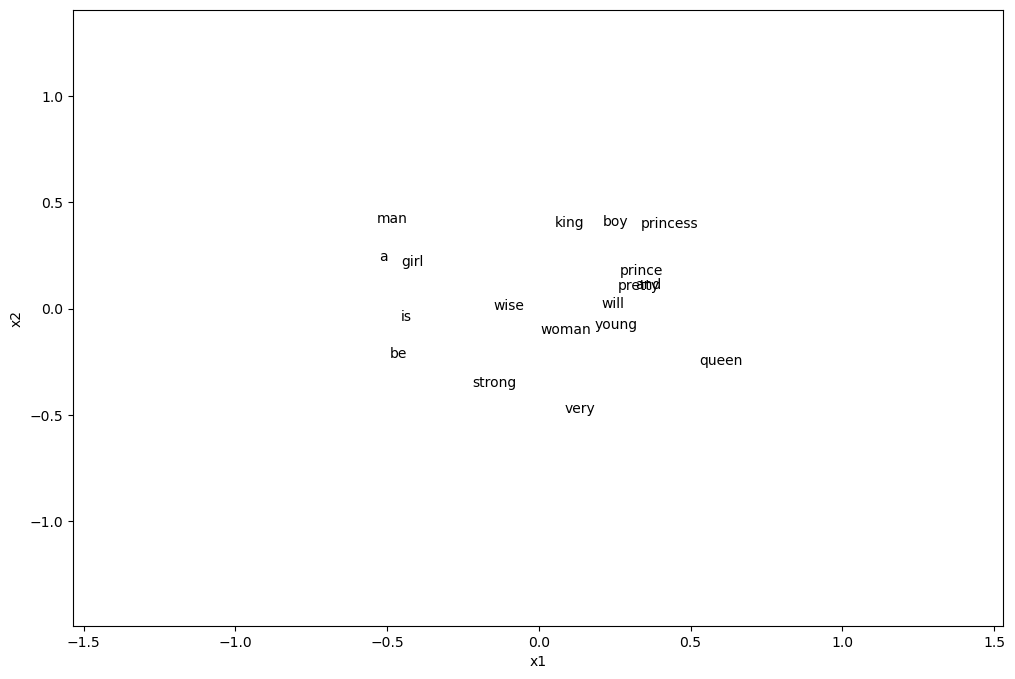

In [42]:
import matplotlib.pyplot as plt
#한글 폰트 사용
# from matplotlib import font_manager
# import matplotlib
# font_path = "C:/Windows/Fonts/malgun.ttf"                       #폰트 경로
# font_name = font_manager.FontProperties(fname=font_path).get_name()  #폰트 이름 얻어오기
# matplotlib.rc('font', family=font_name)                                 #font 지정
# matplotlib.rcParams['axes.unicode_minus'] = False               #한글사용시 마이너스 사인 깨짐 방지

fig, ax = plt.subplots(figsize=(12,8))

for word, x1, x2 in zip(w2v['word'], w2v['x1'], w2v['x2']):
    ax.annotate(word, (x1, x2))
    
PADDING = 1.0
x_axis_min = np.min(vectors, axis=0)[0] - PADDING
y_axis_min = np.min(vectors, axis=0)[1] - PADDING
x_axis_max = np.max(vectors, axis=0)[0] + PADDING
y_axis_max = np.max(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()